# PyTorch - CNN

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F #helper
from torch.utils.data import DataLoader # batching
from torchvision import datasets, transforms # loading dataset
from torchvision.utils import make_grid # for visualization

import numpy as np
import pandas as pd 

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# to help serve as cross validation in deep learning
torch.manual_seed(47) 

## 1. Load the Dataset

In [3]:
# define some transforms (convert 0-255 to 0-1)
transform = transforms.ToTensor()

# if you want to crop the image, rotate the image; they are all done in this transform.

# use pytorch dataset to load <MNIST - dataset of digit image>.

# train
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)

#validation set
train_set, val_set = torch.utils.data.random_split(train_data, [50000,10000])

#test
test_data = datasets.MNIST (root = 'data', train=True, download= True, transform= transform)


In [4]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

## 2. DataLoader

In [5]:
# batch_size = 1: stochastic
# if set train_loader => batch_size = 50000 - batch
# if set val_loader => batch_size = 10000
# if set test_loader => batch_size = 10000

In [6]:
train_loader = DataLoader (train_set, batch_size =64, shuffle=True)
val_loader   = DataLoader (val_set,   batch_size =64, shuffle=True)
test_loader  = DataLoader (test_data, batch_size =64, shuffle= False) # because no training

In [7]:
len(train_loader) # 782 * 64 = 50048 

782

In [8]:
for images, labels in train_loader:
    break


In [9]:
print(images.shape )
# 64 images, 1 channel, 28 width, 28 height
print (labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [10]:
# get the first image
images[0] 

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

7

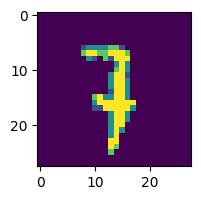

In [11]:
the_image = images[0]
# the_image is channel,height, width, we will transform h,w,channel: use transpose
the_image = np.transpose(the_image, (1,2,0))
plt.figure(figsize=(3,2))
plt.imshow(the_image)

labels[0].item()

## 3. Define the network

In [12]:
images.shape #input

torch.Size([64, 1, 28, 28])

In [13]:
# understanding the relationship between the input and convolutional layer and output

layer1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, stride = 1, padding=1 )

$$0 = \frac{I-F+2P}{S} + 1$$

I = image width/height, F = filter size, P = padding, S = stride, O = output width/height


In [14]:
# how to pass something in to this layer
out = layer1(images)
out.shape

torch.Size([64, 3, 28, 28])

In [15]:
# check the shape for my Conv2d Layers
layer1 = nn.Conv2d (1,  5, 3, 1, 1)
layer2 = nn.Conv2d (5, 10, 3, 1, 1)

out = layer2(layer1(images))
out.shape

torch.Size([64, 10, 28, 28])

In [16]:
layer_3 = nn.Linear(10*28*28, 120)
out = out.reshape (-1, 10* 28 *28)
out.shape

out2 = layer_3(out)
out2.shape

torch.Size([64, 120])

In [17]:
class Kyi_CNN(nn.Module):
    
    def __init__(self): # init all parameters and layers
        super().__init__() # inherit everything from nn.Module
        self.layer1 = nn.Conv2d (1,  5, 3, 1, 1)
        self.layer2 = nn.Conv2d (5, 10, 3, 1, 1)
        # predict
        self.layer3 = nn.Linear(10* 28 * 28, 120)
        self.layer4 = nn.Linear(120, 84)
        self.layer5 = nn.Linear(84, 10) # why 10? because 10 classes
        
    def forward(self, images): # performaing the forward pass through all layers
        # images: 64, 1, 28, 28
        out = F.relu(self.layer1(images))
        # out: 64, 5, 28, 28
        out = F.relu(self.layer2(out))
        # out : 64, 10, 28, 28
        out = out.reshape((-1, 10*28*28))
        # out: 64, 7840
        out = F.relu(self.layer3(out))
        # out : 64, 120
        out = F.relu(self.layer4(out))
        # out : 64, 84
        out = self.layer5(out)
        # out  64, 10
        return out
        

In [18]:
# test
kyi_model = Kyi_CNN()
output = kyi_model(images)
output

tensor([[ 9.1114e-02, -1.4165e-02,  5.1097e-02,  2.5815e-02, -4.5495e-02,
          3.1656e-02, -1.6194e-03,  1.0419e-01,  6.1038e-02,  1.0223e-01],
        [ 9.1274e-02, -1.3656e-02,  4.5651e-02,  2.4789e-02, -4.5820e-02,
          3.0810e-02, -4.7850e-03,  1.0431e-01,  6.0201e-02,  1.0115e-01],
        [ 9.0403e-02, -1.4849e-02,  4.7988e-02,  2.6714e-02, -4.5026e-02,
          3.2364e-02,  3.5785e-03,  1.0061e-01,  6.2360e-02,  1.0581e-01],
        [ 9.1705e-02, -9.9155e-03,  4.4772e-02,  2.8917e-02, -5.2054e-02,
          3.3046e-02,  1.1630e-03,  9.7088e-02,  5.6755e-02,  1.0242e-01],
        [ 8.9981e-02, -1.1283e-02,  5.2177e-02,  2.5440e-02, -4.7037e-02,
          3.6128e-02,  6.8915e-03,  1.0396e-01,  6.1533e-02,  1.0280e-01],
        [ 9.1396e-02, -1.1580e-02,  4.7660e-02,  2.6271e-02, -4.9489e-02,
          3.8322e-02,  2.9823e-03,  1.0538e-01,  6.0376e-02,  1.0088e-01],
        [ 9.0919e-02, -1.0533e-02,  4.8746e-02,  2.8631e-02, -4.5874e-02,
          3.6126e-02,  6.8475e-0

In [ ]:
numbers = torch.tensor ([])

In [19]:
# counting the parameters
total_num_of_params = 0
for param in kyi_model.parameters():
    total_num_of_params += param.numel()
    
print(total_num_of_params)

952444


## 4. Define the Loss and Optimizer

In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(kyi_model.parameters(), lr = 0.001)

## 5. Train the Dataset

In [23]:
num_epoch = 1
# 1. loop epoch
for i in range (num_epoch):
    
    # 2. loop train loader
    for images, labels in train_loader:
        
        # 3. predict / forward pass
        yhat = kyi_model(images)
    
        # 4. calculate loss
        loss = criterion(yhat, labels)
        
        # 5. calculate gradient
        optimizer.zero_grad()
        loss.backward()
    
        # 6. update weight
        optimizer.step()
    
    print(f"epoch: {num_epoch} | loss: {loss}")

epoch: 1 | loss: 0.04384792968630791


## 6. Test

In [24]:
kyi_model.eval() # this will turn off dropout, batch norm
with torch.no_grad(): # this will turn off gradient calculations

    for images, labels in test_loader:
        # 1. predict
        y_hat = kyi_model(images)
        # 2. loss
        loss = criterion(y_hat, labels)
        
print("Cross Entropy Loss:", loss.item())

Cross Entropy Loss: 0.02139492891728878


## 7. Analysis

In [27]:
y_hat.shape, labels.shape

(torch.Size([32, 10]), torch.Size([32]))

In [30]:
y_hat_pred = torch.max(y_hat, 1)[1]
y_hat_pred.shape

torch.Size([32])

In [29]:
# confusion matrix
confusion_matrix(y_hat_pred, labels)

array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 6, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 5, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 4]])

## 8. Inference

In [31]:
test_data[0][0].shape

torch.Size([1, 28, 28])

In [34]:
# plt.imshow(np.transpose(test_data[0][0], (1,2,0)))
# check what is out testing data

In [35]:
pred = kyi_model(test_data[0][0])

In [36]:
pred
# highest is the prediction one

tensor([[ -2.6972,  -1.1760,   0.4943,   8.5972, -10.1518,   9.6627,  -9.2457,
          -0.6088,  -2.4835,   0.3742]], grad_fn=<AddmmBackward0>)